# Nguyen Van Minh

Sau khi đọc dữ liệu từ file CSV vào DataFrame df, hãy thực hiện các yêu cầu sau:

- (2 điểm) Hiển thị 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kích thước DataFrame, số dòng và số cột.
- (2 điểm) Thống kê số lượng xe theo từng hãng (HangXe) và vẽ biểu đồ cột minh họa.
- (2 điểm) Tính giá bán trung bình (GiaBan) của xe theo từng loại (LoaiXe).
- (2 điểm) Lọc ra những xe có dung tích trên 200cc và hiển thị.
- (2 điểm) Vẽ biểu đồ pie thể hiện tỷ lệ xe được bán theo từng loại (LoaiXe).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

In [12]:
# Hiển thị 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kích thước DataFrame, số dòng và số cột.
df = pd.read_csv('motorbike_store.csv')
print('*'*100)
print('Hiển thị 5 dòng đầu tiên\n', df.head(5))
print('*'*100)
print('Hiển thị 5 dòng ngẫu nhiên\n', df.sample(5))
print('*'*100)
print('kích thước DataFrame', df.shape)
print('*'*100)
print(f'Có {df.shape[0]} dòng và {df.shape[1]} cột')
print('*'*100)

****************************************************************************************************
Hiển thị 5 dòng đầu tiên
     MaXe    HangXe  GiaBan  DungTich  NamSanXuat         LoaiXe  SoLuongBan
0  XM001     Honda      45       150        2021         Tay ga         120
1  XM002    Yamaha      38       125        2020         Tay ga          85
2  XM003    Suzuki      50       200        2022        Côn tay          65
3  XM004     Honda      55       300        2023  Phân khối lớn          40
4  XM005  Kawasaki     150       650        2021  Phân khối lớn          25
****************************************************************************************************
Hiển thị 5 dòng ngẫu nhiên
     MaXe  HangXe  GiaBan  DungTich  NamSanXuat         LoaiXe  SoLuongBan
3  XM004   Honda      55       300        2023  Phân khối lớn          40
8  XM009  Yamaha      42       155        2021         Tay ga         100
0  XM001   Honda      45       150        2021         Tay ga     

HangXe
Honda       3
Yamaha      3
Suzuki      3
Kawasaki    1
Name: count, dtype: int64


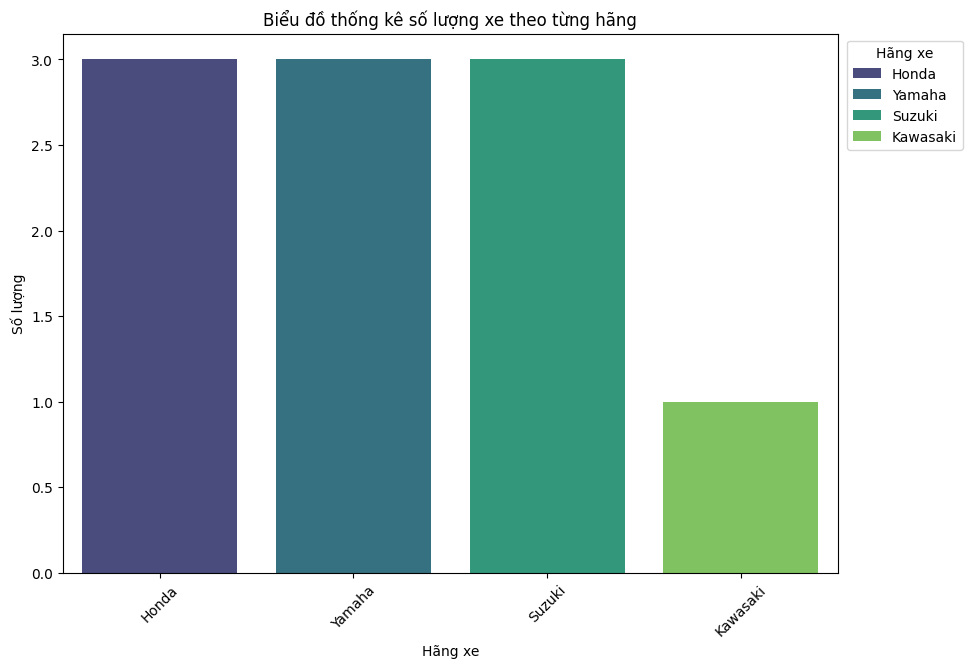

In [34]:
# Thống kê số lượng xe theo từng hãng (HangXe) và vẽ biểu đồ cột minh họa.
hangxe_soluong = df['HangXe'].value_counts()
print(hangxe_soluong)

plt.figure(figsize=(10, 7))
sns.barplot(
    x=hangxe_soluong.index,
    y=hangxe_soluong.values,
    hue=hangxe_soluong.index,
    palette="viridis",
    legend=True
)

plt.xlabel("Hãng xe")
plt.ylabel("Số lượng")
plt.title("Biểu đồ thống kê số lượng xe theo từng hãng")
plt.legend(title="Hãng xe", bbox_to_anchor=(1.17, 1), loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Tính giá bán trung bình (GiaBan) của xe theo từng loại (LoaiXe).
giaban_loaixe_mean = df.groupby('LoaiXe')['GiaBan'].mean()
print('Giá bán trung bình (GiaBan) của xe theo từng loại (LoaiXe):\n', giaban_loaixe_mean)

Giá bán trung bình (GiaBan) của xe theo từng loại (LoaiXe):
 LoaiXe
Côn tay          52.333333
Phân khối lớn    98.333333
Tay ga           40.000000
Name: GiaBan, dtype: float64


In [50]:
# Lọc ra những xe có dung tích trên 200cc và hiển thị.
df[df['DungTich'] > 200]

,MaXe,HangXe,GiaBan,DungTich,NamSanXuat,LoaiXe,SoLuongBan
3,XM004,Honda,55,300,2023,Phân khối lớn,40
4,XM005,Kawasaki,150,650,2021,Phân khối lớn,25
7,XM008,Honda,90,500,2023,Phân khối lớn,30
9,XM010,Suzuki,60,250,2022,Côn tay,55


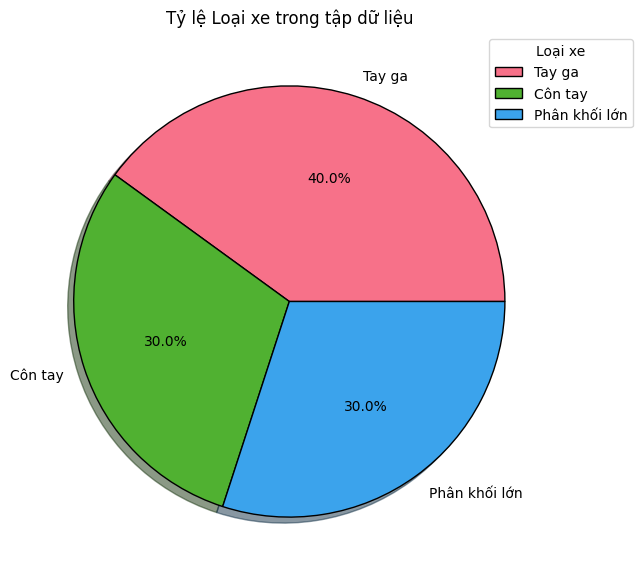

In [65]:
# Vẽ biểu đồ pie thể hiện tỷ lệ xe được bán theo từng loại (LoaiXe).
tyle_loaixe = df['LoaiXe'].value_counts(normalize=True)

plt.figure(figsize=(10, 7))
colors = sns.color_palette("husl", len(tyle_loaixe))

plt.pie(
    tyle_loaixe,
    labels=tyle_loaixe.index,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True,
    # explode=explode,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Tỷ lệ Loại xe trong tập dữ liệu")
plt.legend(title="Loại xe", bbox_to_anchor=(1.15, 1), loc="upper right")
plt.show()